<a href="https://colab.research.google.com/github/PriyaMurali16/PriyaMurali16/blob/main/Kaggle_Dumbledores_Army.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Short description of problem statement**

The main idea of this analysis is to predict the total number of rentals that took place based on attributes such as season, holiday, workingday, weather, temperature, humidity, windspeed, etc,.

Additionally, there was an attribute named "datetime", which represented the date and the time when a particular bike was rented. We have used the feature extraction method to extract different attributes such as year, month, dayofweek, and hour. We believed this will further increase the accuracy of our model.

Later, we checked the normality of our target variable and it was skewed. Therefore, from the assumptions of the regression model, to make sure that our residules are normally distributed with a mean "0", we have performed log transformation on our target variable to get it close to being normally distributed.

While working on this analysis, we have used the following links to helps us proceed further:
1. https://numpy.org/doc/stable/user/index.html
2. https://pandas.pydata.org/docs/user_guide/index.html
3. https://matplotlib.org/
4. https://seaborn.pydata.org/
5. https://scikit-learn.org/stable/
6. https://xgboost.readthedocs.io/en/latest/python/python_intro.html

The resources that helped us with this analysis are:

1. https://medium.com/supervised-learning-on-python-predicting-customer/forecasting-demand-for-bike-sharing-system-with-python-part-3-f385a87e2e90

2. https://towardsdatascience.com/end-to-end-case-study-bike-sharing-demand-dataset-53201926c8db

Importing necessary modules for analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

Reading the training and testing dataset

In [ ]:
train = pd.read_csv("train_luc.csv")
test = pd.read_csv("test_luc.csv")

In [ ]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-17 00:00:00,1,1,0,2,8.2,9.85,47,15.0013
1,2011-01-17 01:00:00,1,1,0,2,8.2,9.85,44,12.9980


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    9174 non-null   object 
 1   season      9174 non-null   int64  
 2   holiday     9174 non-null   int64  
 3   workingday  9174 non-null   int64  
 4   weather     9174 non-null   int64  
 5   temp        9174 non-null   float64
 6   atemp       9174 non-null   float64
 7   humidity    9174 non-null   int64  
 8   windspeed   9174 non-null   float64
 9   casual      9174 non-null   int64  
 10  registered  9174 non-null   int64  
 11  count       9174 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 860.2+ KB


In [ ]:
#Checking for missing values

train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
#Checking for duplicate values

train.duplicated().sum()

0

# **Exploratory Data Analysis**

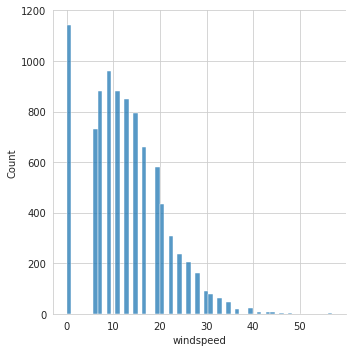

In [ ]:
sns.displot(train,x = "windspeed")

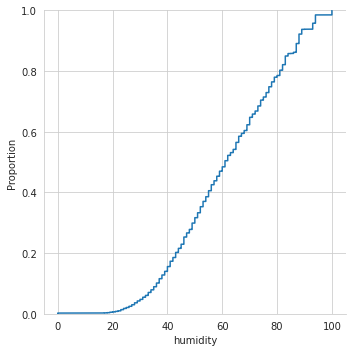

In [ ]:
sns.displot(train, x="humidity", kind="ecdf")

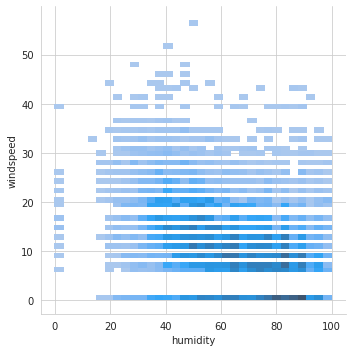

In [ ]:
sns.displot(train, x="humidity", y= "windspeed")

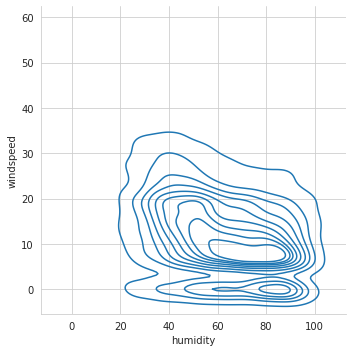

In [ ]:
sns.displot(train, x="humidity", y= "windspeed",kind="kde")

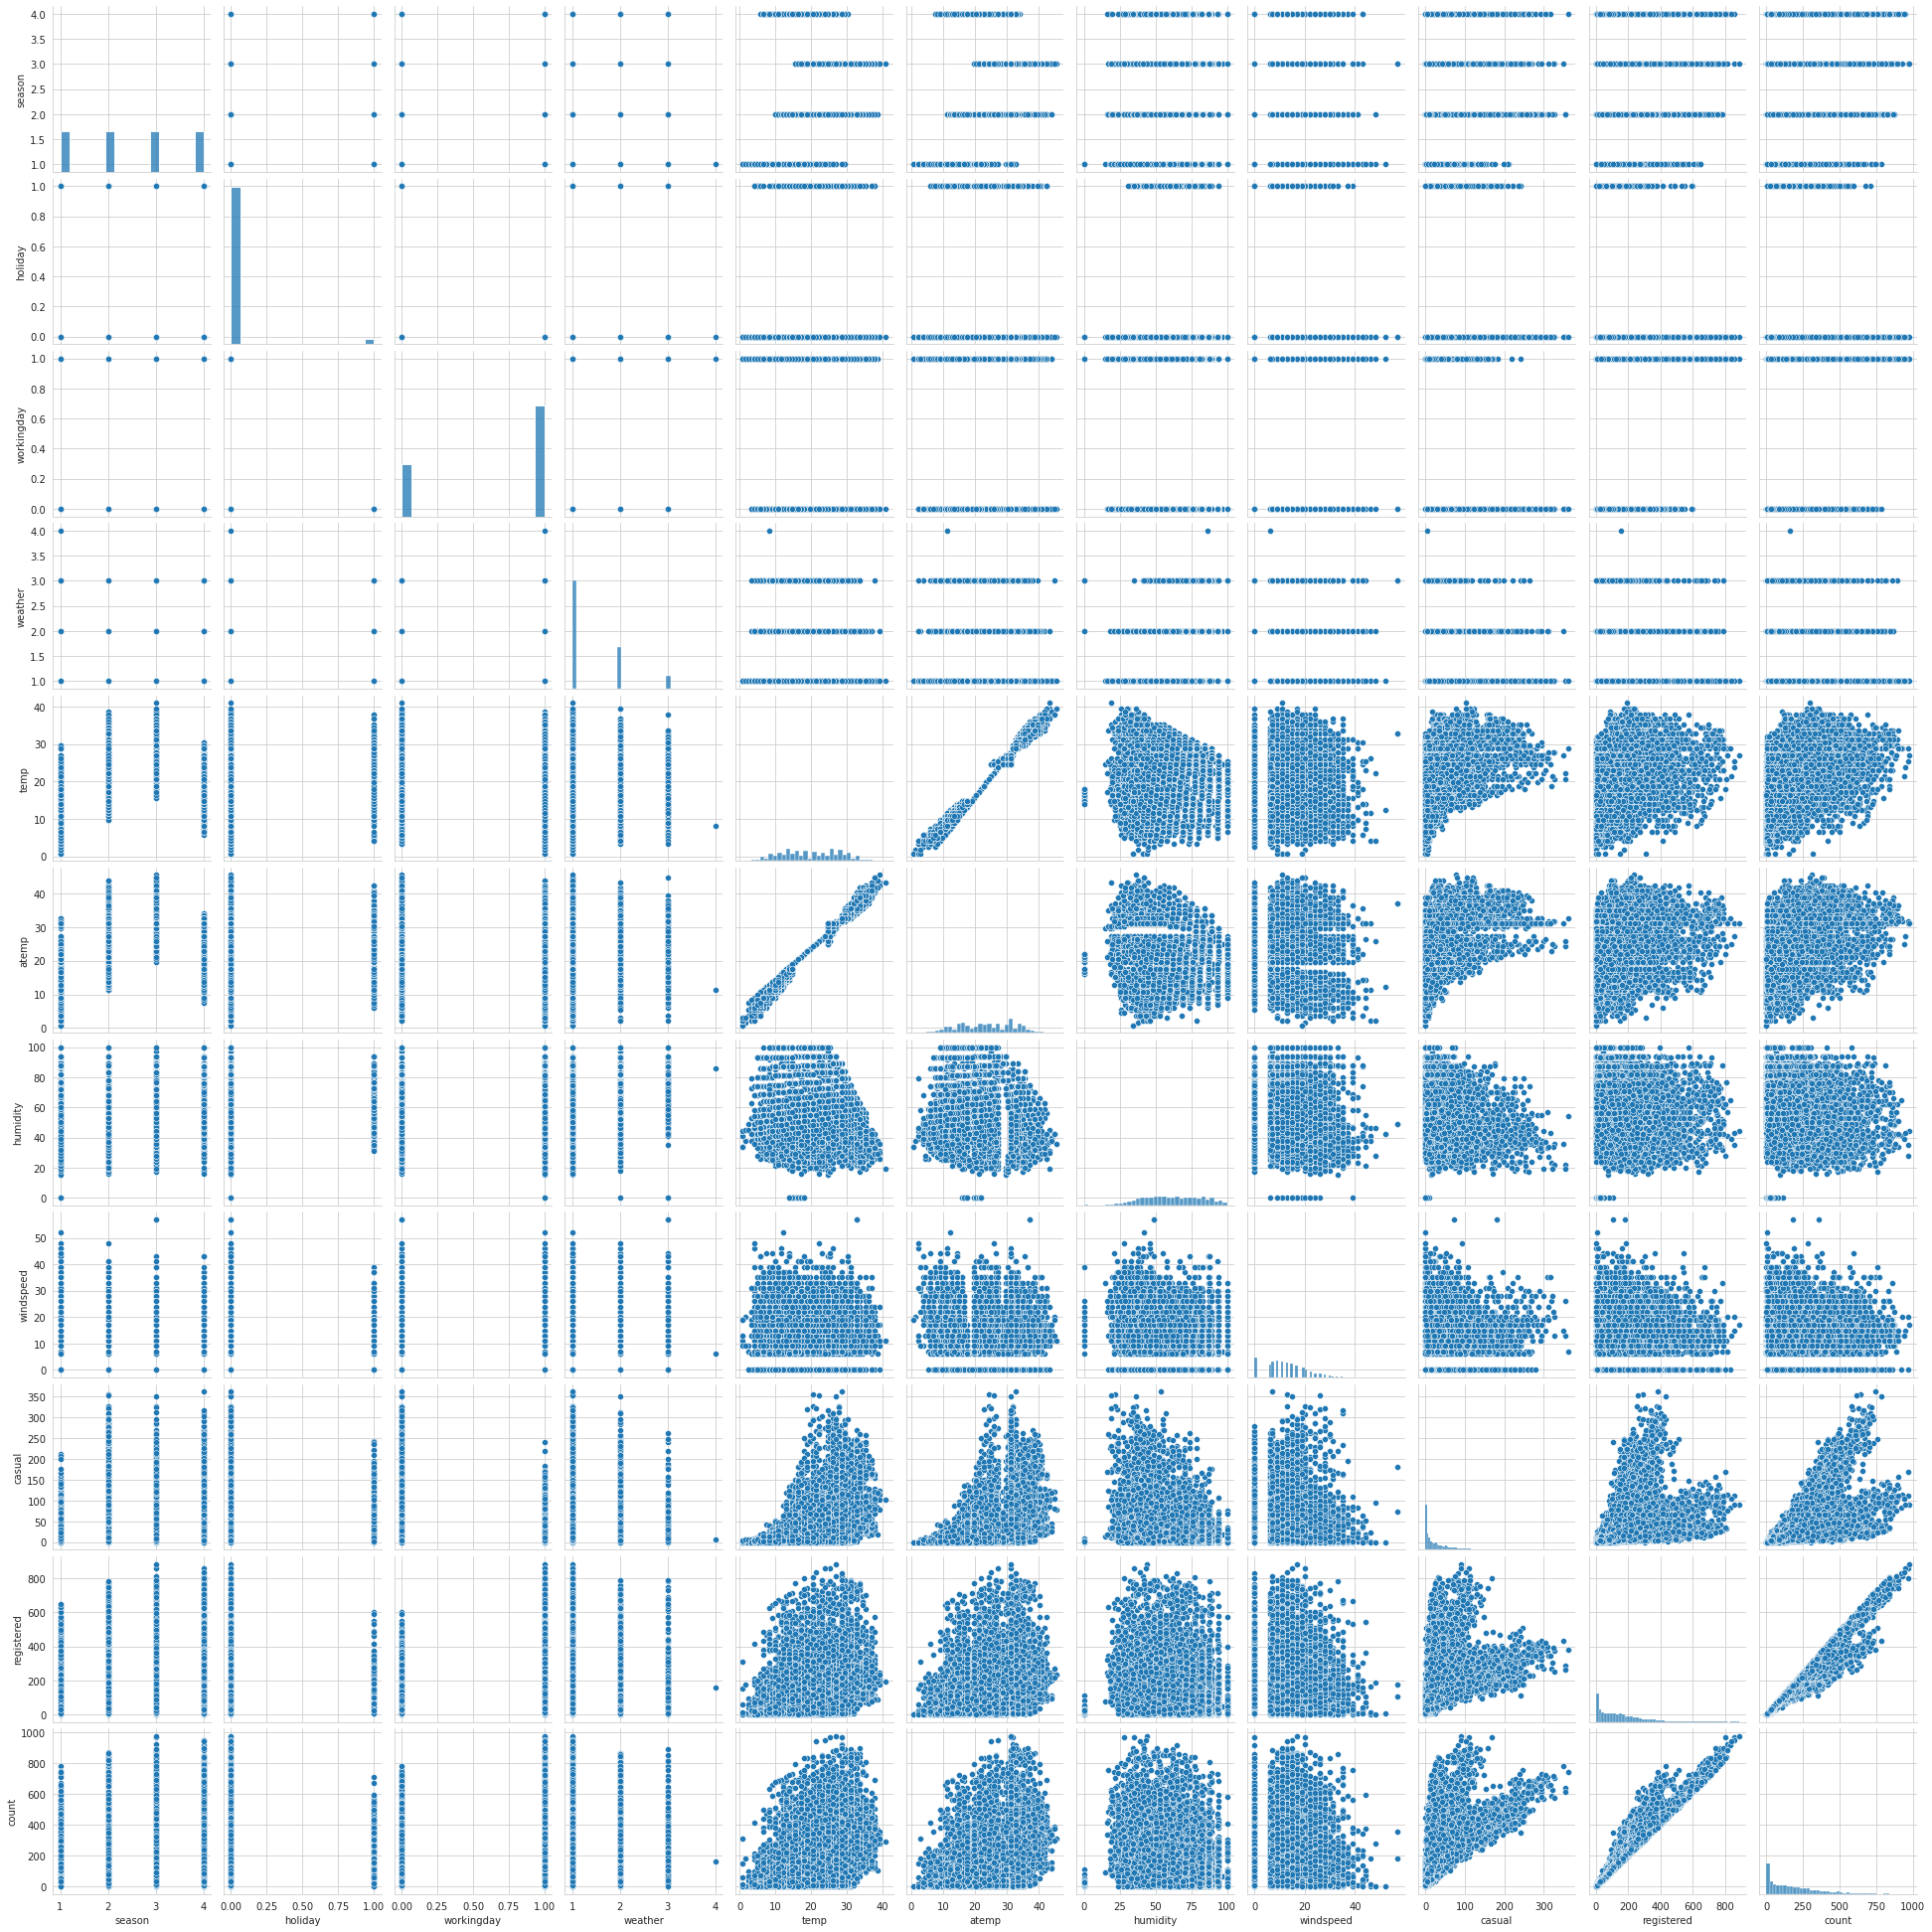

In [ ]:
sns.pairplot(train)

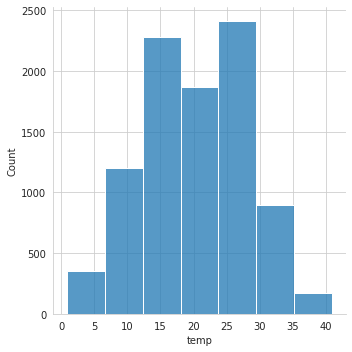

In [ ]:
sns.displot(train,x = "temp",bins=7)

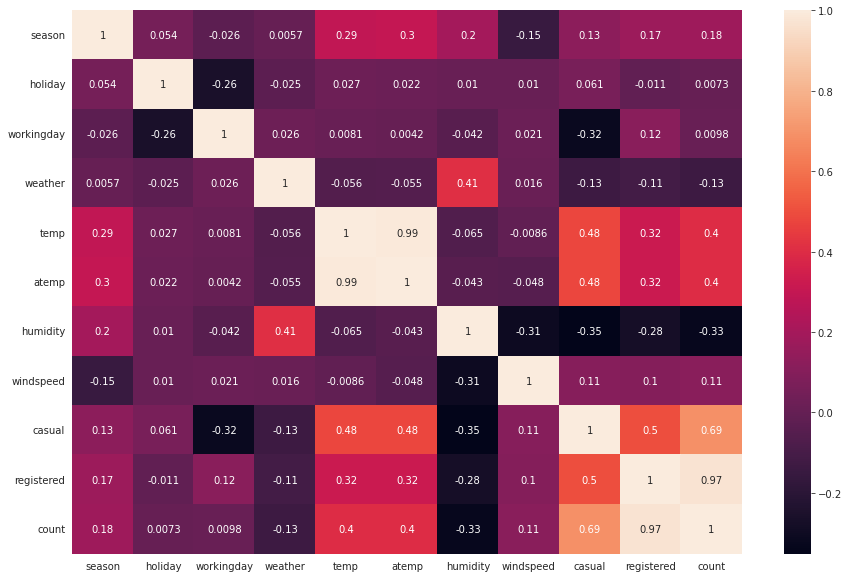

In [ ]:
#correlation analysis


plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), annot = True)

In [ ]:
##Without the heatmap
corrMatrix = train.corr()
print (corrMatrix)

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.053782   -0.026057  0.005661  0.289411  0.300836   
holiday     0.053782  1.000000   -0.261289 -0.024705  0.027247  0.021613   
workingday -0.026057 -0.261289    1.000000  0.025796  0.008080  0.004248   
weather     0.005661 -0.024705    0.025796  1.000000 -0.056071 -0.054807   
temp        0.289411  0.027247    0.008080 -0.056071  1.000000  0.992399   
atemp       0.300836  0.021613    0.004248 -0.054807  0.992399  1.000000   
humidity    0.198118  0.010063   -0.042038  0.408866 -0.064663 -0.043438   
windspeed  -0.148175  0.010490    0.020902  0.016127 -0.008570 -0.048005   
casual      0.128765  0.060569   -0.318646 -0.133502  0.479073  0.478243   
registered  0.171627 -0.011170    0.116545 -0.112213  0.323455  0.322273   
count       0.178485  0.007303    0.009777 -0.130228  0.401246  0.400032   

            humidity  windspeed    casual  registered     count  
season      0.198118 

In [ ]:
#atemp is higherly correlated with temp variable.

#registered and casual are also related to count

#Therefore removing atemp, registered and casual attributes.

train.drop(labels = ["atemp", "casual", "registered"], axis = 1, inplace = True)
test.drop(labels = "atemp", axis = 1, inplace = True)

In [ ]:
#Feature Extraction

train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})

test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})

In the above code we are setting all 2011 present values to 0 and 2012 values to 1

In [ ]:
date_time = test.datetime
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [ ]:
train.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,81,0.0,16,0,5,1,0
1,1,0,0,1,9.02,80,0.0,40,1,5,1,0


In [ ]:
test.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,day,month,year
0,1,1,0,2,8.2,47,15.0013,0,0,1,0
1,1,1,0,2,8.2,44,12.9980,1,0,1,0


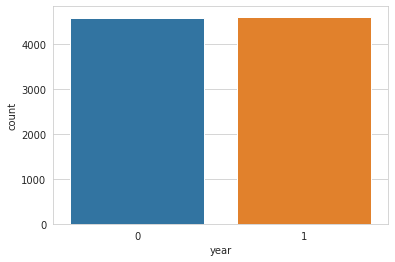

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "year", data = train)

[Text(0.5, 1.0, 'Count of bikes each month')]

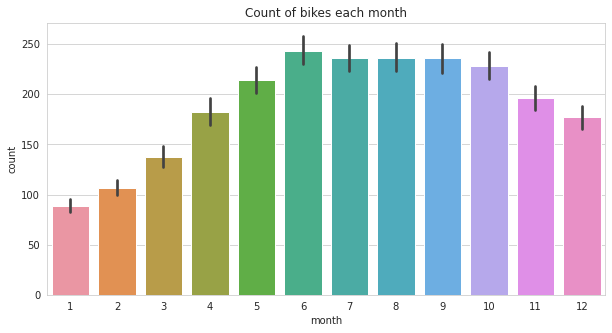

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=train, x='month', y='count', ax=ax)
ax.set(title='Count of bikes each month')

[Text(0.5, 1.0, 'Count of bikes based on days of week')]

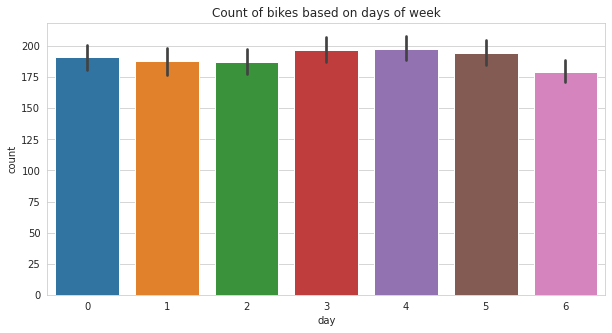

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=train, x='day', y='count', ax=ax)
ax.set(title='Count of bikes based on days of week')

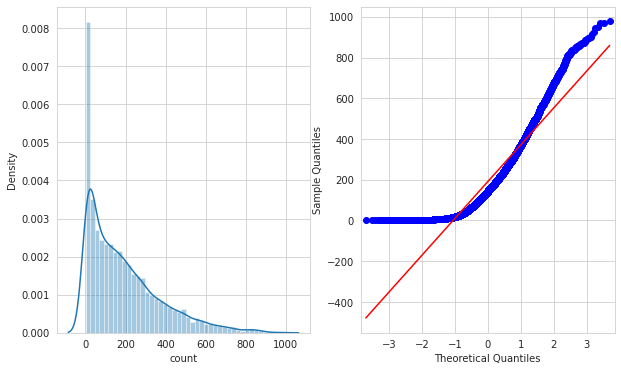

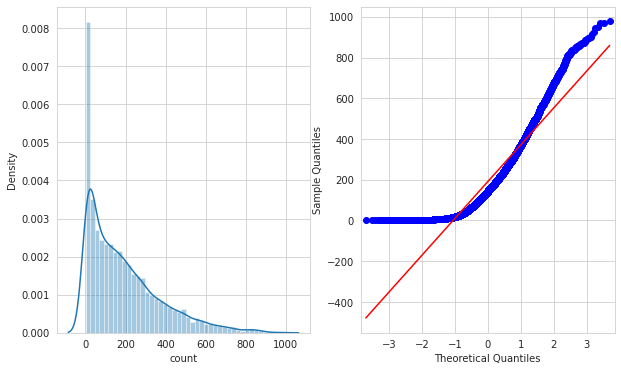

In [ ]:
#checking the distribution of the target variable

import statsmodels.api as sm

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.distplot(train["count"], ax = ax1)
sm.qqplot(train["count"],ax = ax2, line = 's')

In [ ]:
#It is not normally distributed, so performing log transformation on the target variable

train['count']=np.log(train['count']+1)

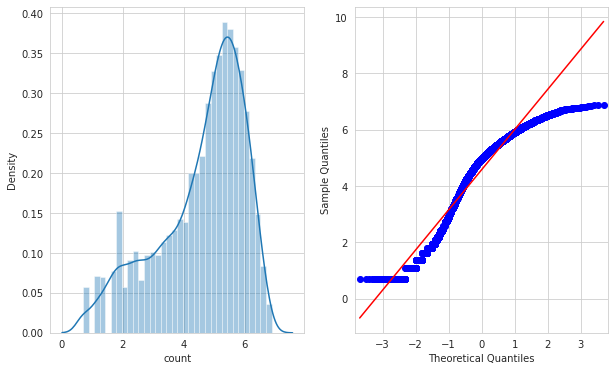

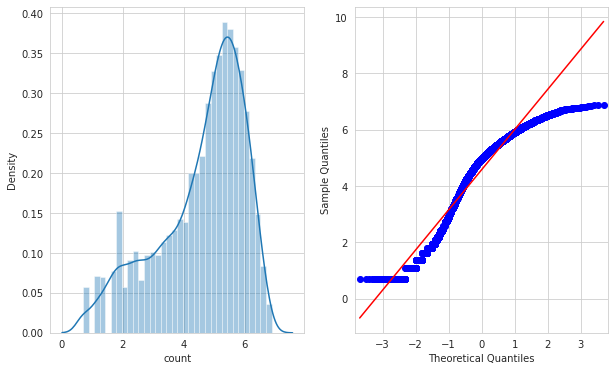

In [ ]:
#Checking the distribution again and now the distribution is better then before.
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.distplot(train["count"], ax = ax1)
sm.qqplot(train["count"],ax = ax2, line = 's')

## **IMPORTANT**

##Generally , the residuals that’s the actual- predicted should be normally distributed and have mean around zero and have constant variance. 

##So normally once we build our model , we plot the residuals and check if it’s normally distributed , if not then we transform the target variable and re-run our model. 

##In our case , I’ve made sure to check the distribution of the target variable before hand and saw, it was skewed. So I’ve log transformed it before hand, because I knew the residuals were not gonna be normally distributed for skewed data. So that’s why I’ve performed log transformation before hand

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Y_train = train['count']
X_train = train.drop(['count'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_train , Y_train,  train_size=0.8, test_size=0.2, random_state =0)

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,min_samples_leaf=1,random_state=0, n_jobs = -1)
rf.fit(x_train,y_train)

pred = rf.predict(x_test)
score=np.sqrt(mean_squared_error(y_test, pred))
print("The Root Mean Squared Error is:",score)

The Root Mean Squared Error is: 0.3061371826408156


In [ ]:
#XGBoost
import xgboost as xgb

xg_reg = xgb.XGBRegressor( colsample_bytree = 0.8, learning_rate = 0.149,min_child_weight =25, max_depth = 3,  n_estimators = 450)
xg_reg.fit(x_train,y_train)
pred=xg_reg.predict(x_test)
score=np.sqrt(mean_squared_error(y_test, pred))
print("The Root Mean Squared Error is:",score)

[00:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Root Mean Squared Error is: 0.2964037184561634


The RMSE of XGBoost is smaller, so we are proceeding with XGBoost

In [ ]:
prediction = xg_reg.predict(test) 
prediction = (np.exp(prediction)-1)

In [ ]:
output = pd.DataFrame({'datetime': date_time,'count': prediction})
output.to_csv('Dumbledores_Army.csv', index=False)

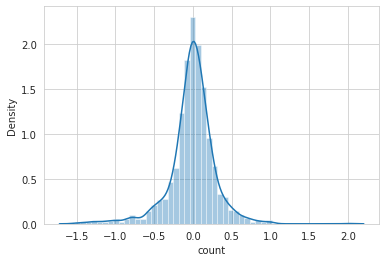

In [ ]:
#Checking the distribution on the residules

sns.distplot((y_test-pred))

The residules are normally distributed so we have build a good model